### Generating a graph of radial power distribution

In [45]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from math import hypot, atan
from FT_model import model_FT
from fits_to_pupil import generate_pupil
from mpl_toolkits.axes_grid1 import make_axes_locatable
from radial_gradient import RWGE
from power_region import power_ratio
from symmetry import create_symmetry

In [2]:
pupils = []
for i in range(10):
    if i == 0 or i == 5:
        continue
    pupil_name = "ToliBoy_Pupil_Designs/ToliBoy_Pupil_{}.fits".format(i+1)
    pupil = generate_pupil(fits.open(pupil_name)[0].data)
    pupils.append(pupil)

In [3]:
lam = 525e-9
D = 0.018
fl = 0.15
pix_size = 1.12e-6
num_fringes = 10.5
physical_radius = fl*math.tan(num_fringes*lam/D)
num_pixels = physical_radius/pix_size
print(num_pixels)

41.015626282272386


In [42]:
aperture = 0.018                 # Aperture (m)
npixels = 1024                   # Size of detector, in pixels
wl = 0.525e-6                    # Wavelength values (micrometers)
fl = 0.15                        # Focal length (m)
detector_pitch = 1.12e-6         # m/pixel on detector (pixel spacing)

size = 200
fringe_radii = num_pixels
c = npixels//2

sums = []
cum_sums = []

for i in range(len(pupils)):
    pupil = pupils[i]

    im_out = model_FT(pupil, aperture, npixels, [wl], fl, detector_pitch)
    im_out = im_out/np.sum(im_out)
    
    regions = np.zeros(npixels)
    for j in range(npixels):
        for k in range(npixels):
            x = j - c
            y = k - c
            r = int(hypot(x, y))
            regions[r] += im_out[j][k]
              
    cum_sum = np.zeros(npixels)
    for i in range(len(regions)):
        if i == 0:
            cum_sum[i] = regions[i]
        else:
            cum_sum[i] = cum_sum[i-1] + regions[i]

    sums.append(regions)
    cum_sums.append(cum_sum)

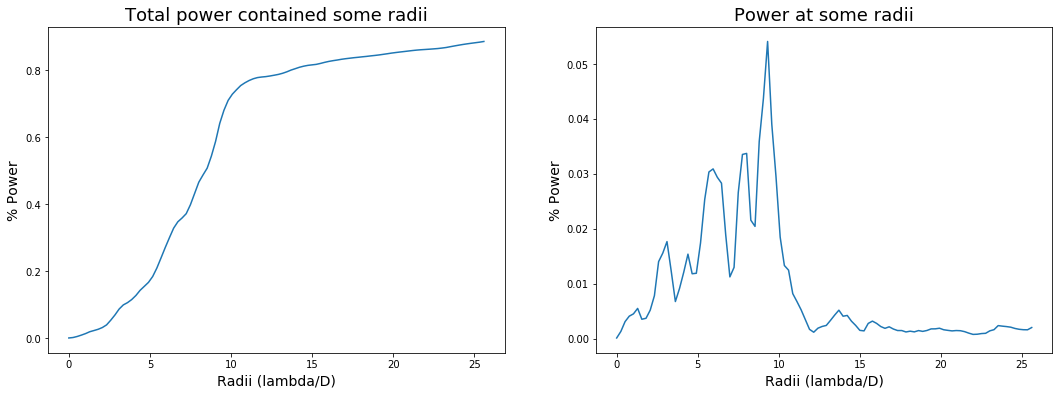

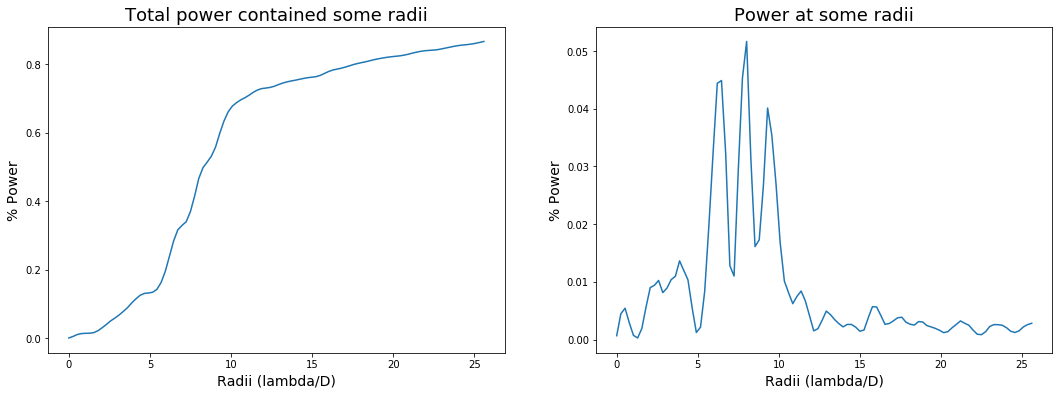

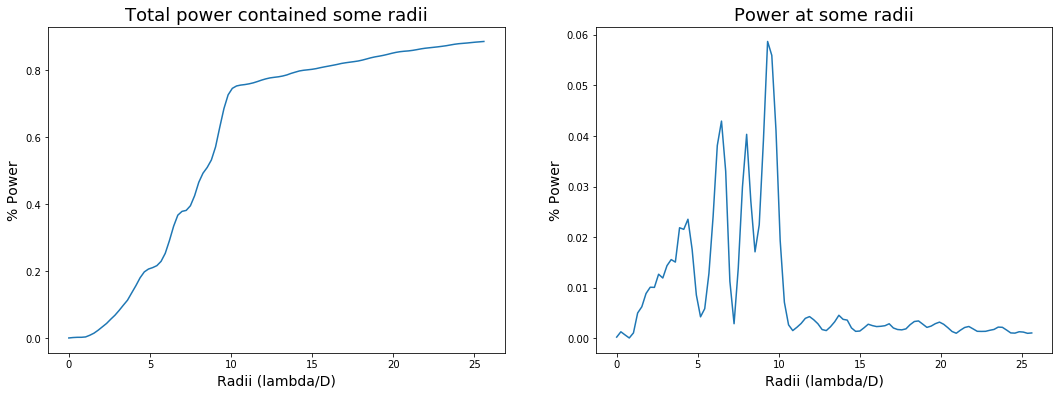

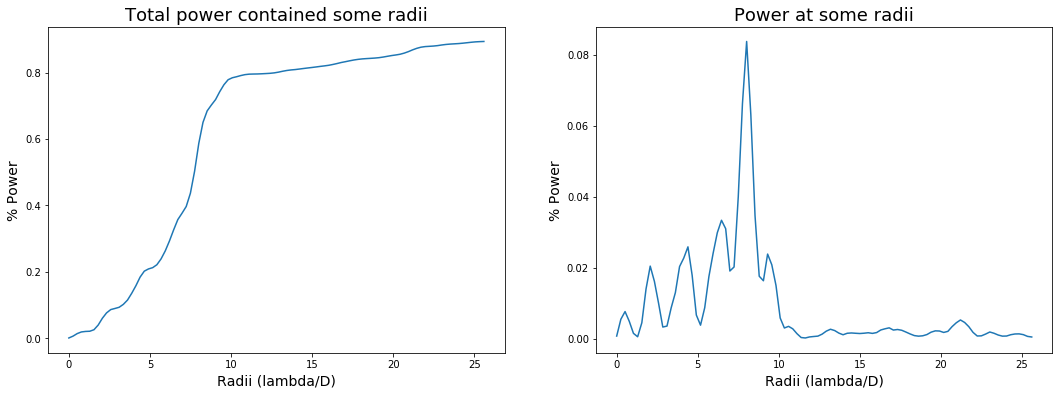

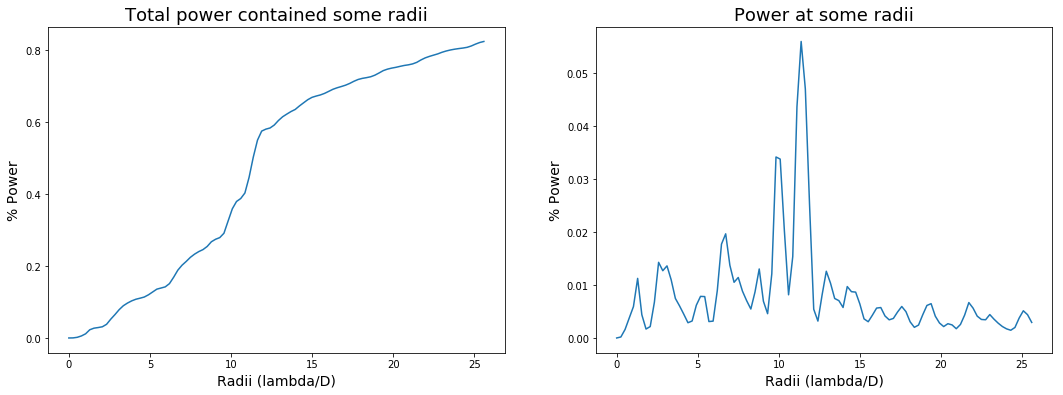

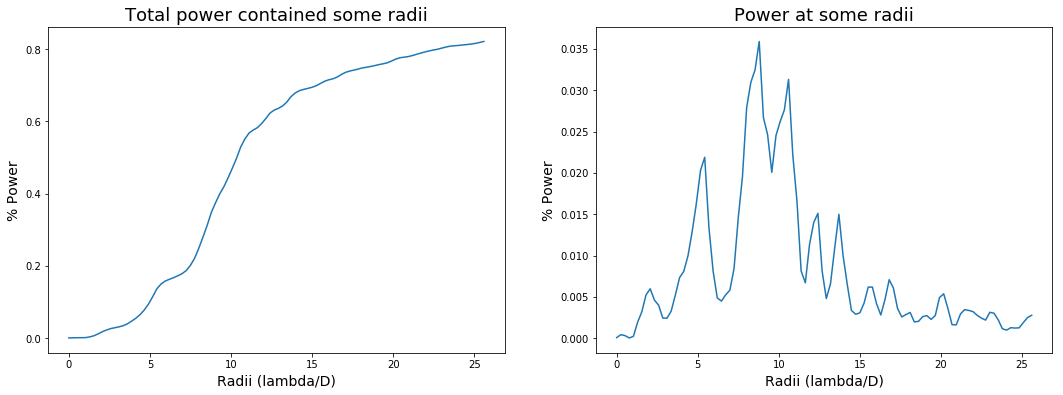

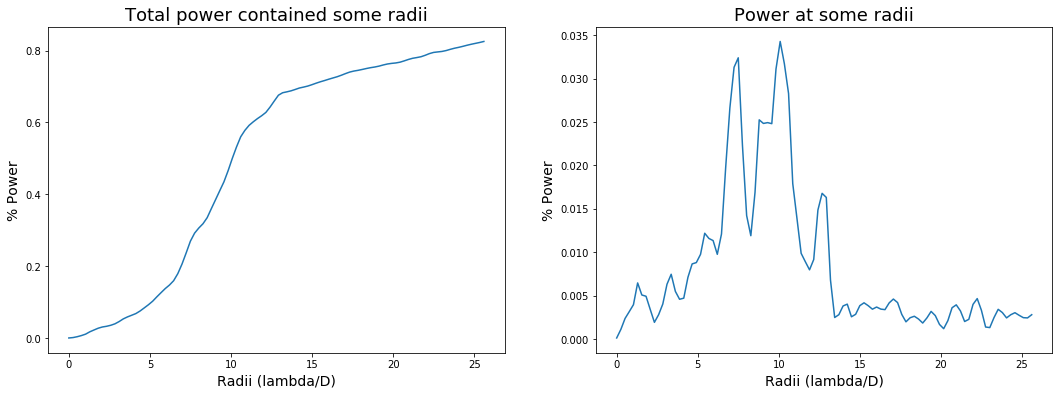

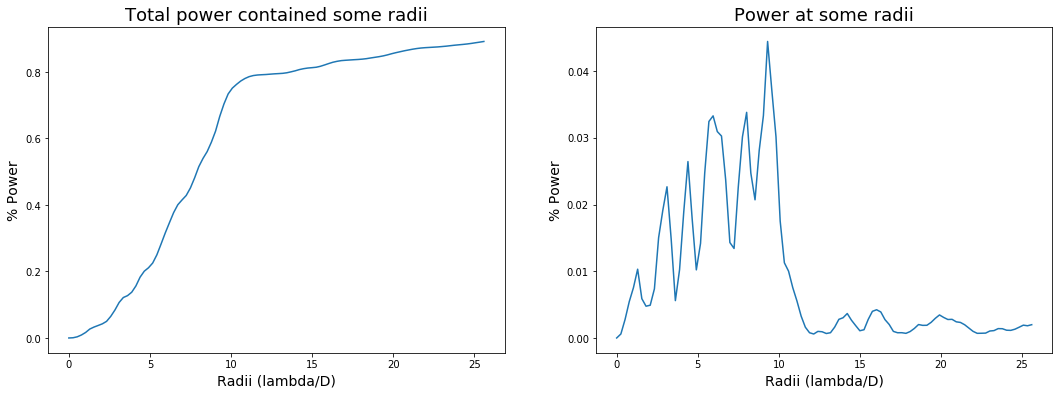

In [57]:
r_max = 100
fsize = (18,6)
fringes = atan(r_max*pix_size/fl)*D/lam

r = np.linspace(0, fringes, r_max)

for i in range(len(cum_sums)):
    fig, axs = plt.subplots(1, 2, figsize=fsize)
    im = axs[0].plot(r[:r_max],cum_sums[i][:r_max])
    axs[0].set_title("Total power contained some radii", fontsize=18)
    axs[0].set_xlabel("Radii (lambda/D)", fontsize=14)
    axs[0].set_ylabel("% Power", fontsize=14)
    
    im = axs[1].plot(r[:r_max],sums[i][:r_max])
    axs[1].set_title("Power at some radii", fontsize=18)
    axs[1].set_xlabel("Radii (lambda/D)", fontsize=14)
    axs[1].set_ylabel("% Power", fontsize=14)    